In [4]:
def plotting(df,anomaly_indices,t):
    # Plot the data and anomalies
    plt.plot(df['timestamp'], df['value'], label='Sensor Data')
    plt.plot(df['timestamp'], [mean]*len(df), 'r--', label='Mean')
    plt.plot(df['timestamp'], [upper_control_limit]*len(df), 'k--', label='Upper Control Limit')
    plt.plot(df['timestamp'], [lower_control_limit]*len(df), 'k--', label='Lower Control Limit')
    plt.scatter(df.loc[anomaly_indices, 'timestamp'], df.loc[anomaly_indices, 'value'], color='red', label='Anomalies')
    plt.xlabel('Timestamp')
    plt.ylabel('Sensor Value')
    plt.legend()
    plt.title(t)
    plt.show()

# Using Isolation Forest

In [111]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

# Load the time series data into a Pandas DataFrame
df = pd.read_csv('occupancy_t4013.csv')

# Convert the timestamp column to a Pandas datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the timestamp column as the DataFrame index
df.set_index('timestamp', inplace=True)

# Remove any missing or NaN values from the DataFrame
df.dropna(inplace=True)

# Define the number of estimators for the IsolationForest algorithm
n_estimators = 100

# Instantiate the IsolationForest model
isolation_forest = IsolationForest(n_estimators=n_estimators, contamination='auto')

# Train the model on the time series data
isolation_forest.fit(df)

# Predict the anomalous observations in the time series data
is_anomaly = isolation_forest.predict(df)

# Create a new DataFrame with the anomalous observations flagged
df_anomalies = df.copy()
df_anomalies['anomaly'] = np.where(is_anomaly == -1, True, False)

anomaly_indices = np.where(is_anomaly == -1)

# Print out the number of anomalous observations detected
print(f"Number of anomalies detected: {df_anomalies['anomaly'].sum()}")
print("Percentage of anamolies: ",round(df_anomalies['anomaly'].sum()/df.shape[0],4),"%")

Number of anomalies detected: 586
Percentage of anamolies:  0.2344 %


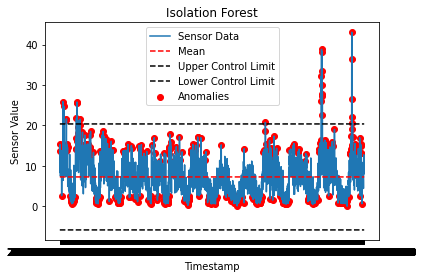

In [115]:
df = pd.read_csv('occupancy_t4013.csv')
plotting(df,anomaly_indices,"Isolation Forest")

# Using Z test

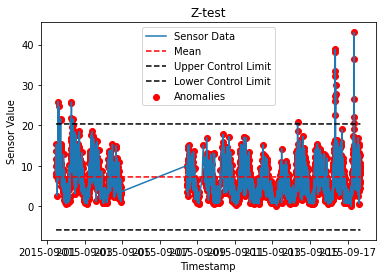

In [20]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('occupancy_t4013.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

alpha = 0.05
df['z_score'] = (df['value'] - df["value"].mean()) / (df['value'].std()/(df['value'].shape[0])**0.5) 

# Define a threshold value for the z-score
z_critical = norm.ppf(1 - (alpha/2)) 

# Find the indices of data points whose z-score is greater than the threshold
anomaly_indices1 = np.where(df['z_score'] > z_critical)[0]
anomaly_indices2 = np.where(df['z_score'] < -1*z_critical)[0]
anomaly_indices = np.concatenate([anomaly_indices1,anomaly_indices2])

plotting(df,anomaly_indices,"Z-test") 


# Using statistical process control charts

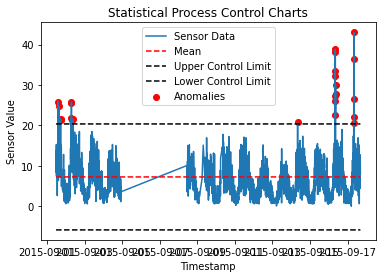

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('occupancy_t4013.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Compute the mean and standard deviation of the data
mean = df['value'].mean()
std = df['value'].std()

# Define the control limits for the Shewhart chart
upper_control_limit = mean + 3*std
lower_control_limit = mean - 3*std

# Create a boolean array to indicate which data points are out of control
out_of_control = (df['value'] > upper_control_limit) | (df['value'] < lower_control_limit)

# Find the indices of the out of control data points
anomaly_indices = np.where(out_of_control)[0]

plotting(df,anomaly_indices,"Statistical Process Control Charts")